In [ ]:
!pip install mteb==1.1.1 datasets beir sentence_transformers matplotlib numpy pandas

In [1]:
from beir import util, LoggingHandler
from beir.datasets.data_loader import GenericDataLoader

import logging
import pathlib, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset


/Users/konstantinspiess/miniconda3/envs/nlp/lib/python3.11/site-packages/beir/util.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# CQADupStack

Download dataset if necessary

In [2]:
DOWNLOAD_DATASET = False

if DOWNLOAD_DATASET:
  #### Just some code to print debug information to stdout
  logging.basicConfig(format='%(asctime)s - %(message)s',
                      datefmt='%Y-%m-%d %H:%M:%S',
                      level=logging.INFO,
                      handlers=[LoggingHandler()])
  #### /print debug information to stdout

  #### Download cqadupstack.zip dataset and unzip the dataset
  dataset = "cqadupstack"
  url = "https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{}.zip".format(dataset)
  out_dir = os.path.join(pathlib.Path('.').parent.absolute(), "datasets")
  data_path = util.download_and_unzip(url, out_dir)

## Dataset Analysis

In [3]:
subsets = [
    "android",
    "english",
    "gaming",
    "gis",
    "mathematica",
    "physics",
    "programmers",
    "stats",
    "tex",
    "unix",
    "webmasters",
    "wordpress"
]

In [4]:
total_word_counts = []

for subset in subsets:
  corpus, queries, qrels = GenericDataLoader(data_folder=f"datasets/cqadupstack/{subset}").load(split="test")
  word_counts = [len(entry['text'].split()) for entry in corpus.values()]
  total_word_counts.extend(word_counts)

bins = [0, 20, 50, 100, 200, 500, 1000, 2000, 5000]

bin_values = []
for i in range(len(bins) - 1):
    bin_values.append(sum([1 for count in word_counts if bins[i] < count <= bins[i + 1]]))

  0%|          | 0/22998 [00:00<?, ?it/s]

100%|██████████| 48605/48605 [00:00<00:00, 249801.06it/s]


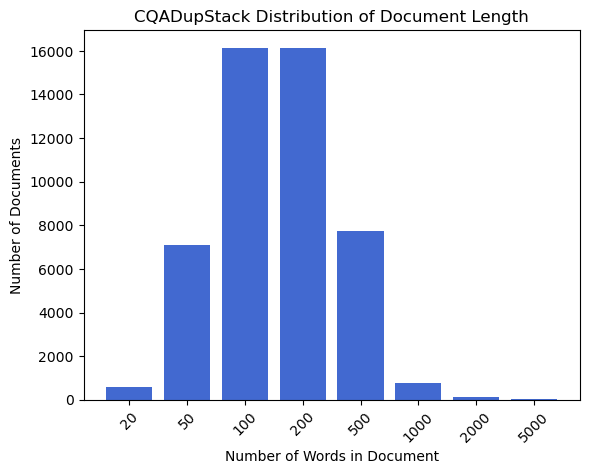

In [5]:
# Data for plotting
bins = ["20", "50", "100", "200", "500", "1000", "2000", "5000"]
counts = bin_values

# Creating the plot
plt.bar(bins, counts, color='#4269D0')
plt.xlabel('Number of Words in Document')
plt.ylabel('Number of Documents')
plt.title('CQADupStack Distribution of Document Length')
plt.xticks(rotation=45)

plt.rcParams["font.family"] = "Inter"

# higher resolution output without saving the file
plt.savefig('plots/retrieval/cqadupstack_word_distribution.png', dpi=300, bbox_inches="tight")


# Show the plot
plt.show()


# Result Evaluation

In [6]:
# Load the data
file_path = 'results/retrieval/cqadupstack/benchmark_results_jinaai_jina-embeddings-v2-base-en.csv'
data = pd.read_csv(file_path)

# add total count for each bin_label to the dataframe
data['total_count'] = data.groupby('bin_label')['count'].transform('sum')

# for each entry multiply ndcg by count/total count in bin
data['weighted_ndcg'] = data['NDCG@10'] * data['count'] / data['total_count']

grouped_data = data.groupby('bin_label').agg({'weighted_ndcg': 'sum', 'count': 'sum'}).reset_index()

grouped_data

,bin_label,weighted_ndcg,count
0,1-19,0.371537,734
1,100-199,0.359192,4514
2,1000-1999,0.105471,19
3,20-49,0.387471,4533
4,200-499,0.334715,1611
5,50-99,0.389956,6184
6,500-999,0.318070,160


In [7]:
# Load the data
file_path = 'results/retrieval/cqadupstack/benchmark_results_thenlper_gte-base.csv'
data = pd.read_csv(file_path)

# add total count for each bin_label to the dataframe
data['total_count'] = data.groupby('bin_label')['count'].transform('sum')

# for each entry multiply ndcg by count/total count in bin
data['weighted_ndcg'] = data['NDCG@10'] * data['count'] / data['total_count']

grouped_data = data.groupby('bin_label').agg({'weighted_ndcg': 'sum', 'count': 'sum'}).reset_index()

grouped_data

,bin_label,weighted_ndcg,count
0,1-19,0.432625,686
1,100-199,0.367749,4324
2,1000-1999,0.158290,19
3,20-49,0.453172,4215
4,200-499,0.331691,1555
5,50-99,0.424775,5857
6,500-999,0.330864,155


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

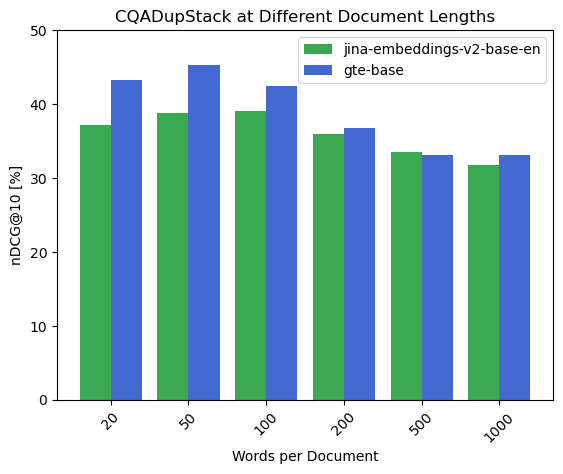

In [8]:
# Data for plotting
chunk_sizes = ["20", "50", "100", "200", "500", "1000"]
ndcg_scores_jina = [37.1537, 38.7471, 38.9956, 35.9192, 33.4715, 31.8070]
ndcg_scores_gte = [43.2625, 45.3172, 42.4775, 36.7749, 33.1691, 33.0864]

# Setting the positions and width for the bars
positions = np.arange(len(chunk_sizes))
width = 0.4  # the width of the bars

# Plotting both the bar charts side by side
plt.bar(positions - width/2, ndcg_scores_jina, width, label='jina-embeddings-v2-base-en', color='#3BA951')
plt.bar(positions + width/2, ndcg_scores_gte, width, label='gte-base', color='#4269D0')

plt.legend()

plt.xlabel('Words per Document')
plt.ylabel('nDCG@10 [%]')
plt.title('CQADupStack at Different Document Lengths')
plt.xticks(positions, chunk_sizes)
plt.xticks(rotation=45)


# y axis up to 50
plt.ylim(0, 50)

plt.rcParams["font.family"] = "Inter"

# higher resolution output without saving the file
plt.savefig('plots/retrieval/cqadupstack_ndcg_normalized.png', dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


# NarrativeQA

## Dataset Analysis

In [9]:
dataset = load_dataset("narrativeqa", split="test", trust_remote_code=True)

documents = list({row['document']['id']: row['document'] for row in dataset}.values())
queries = [row['question']['text'] for row in dataset]

document_lengths = [len(document['text'].split()) for document in documents]
queries_lengths = [len(query.split()) for query in queries]

In [10]:
bins = [0, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 100000]

# print the number of documents in each bin, exclude lower bound and include upper bound
print('Number of documents in each bin:')
print('Bin\tCount')
document_length_bins = {}
for i in range(len(bins) - 1):
    count = len([length for length in document_lengths if bins[i] < length <= bins[i + 1]])
    print(f'{bins[i + 1]}\t{count}')

# print the number of queries in each bin, exclude lower bound and include upper bound  
print('Number of queries in each bin:')
print('Bin\tCount')
for i in range(len(bins) - 1):
    count = len([length for length in queries_lengths if bins[i] < length <= bins[i + 1]])
    print(f'{bins[i + 1]}\t{count}')

Number of documents in each bin:
Bin	Count
20	0
50	0
100	0
200	0
500	0
1000	0
2000	0
5000	8
10000	6
20000	28
50000	202
100000	69
200000	34
500000	8
100000	0
Number of queries in each bin:
Bin	Count
20	10520
50	37
100	0
200	0
500	0
1000	0
2000	0
5000	0
10000	0
20000	0
50000	0
100000	0
200000	0
500000	0
100000	0


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

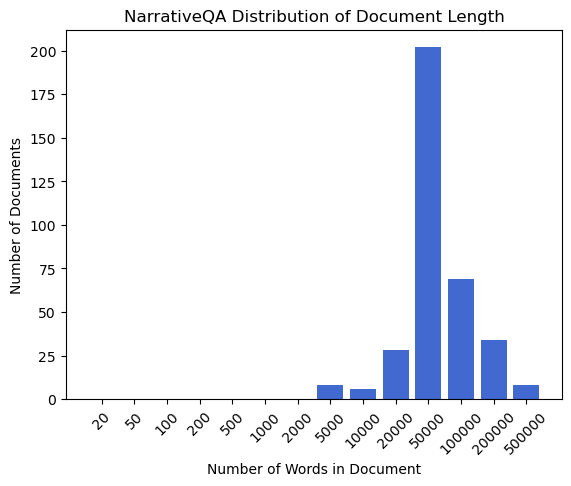

In [11]:
# Data for plotting
bins = ["20", "50", "100", "200", "500", "1000", "2000", "5000", "10000", "20000", "50000", "100000", "200000", "500000"]
counts = [0, 0, 0, 0, 0, 0, 0, 8, 6, 28, 202, 69, 34, 8]

plt.bar(bins, counts, color='#4269D0')
plt.xlabel('Number of Words in Document')
plt.ylabel('Number of Documents')
plt.title('NarrativeQA Distribution of Document Length')
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Inter"

# higher resolution output without saving the file
plt.savefig('plots/retrieval/narrativeqa_word_distribution.png', dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

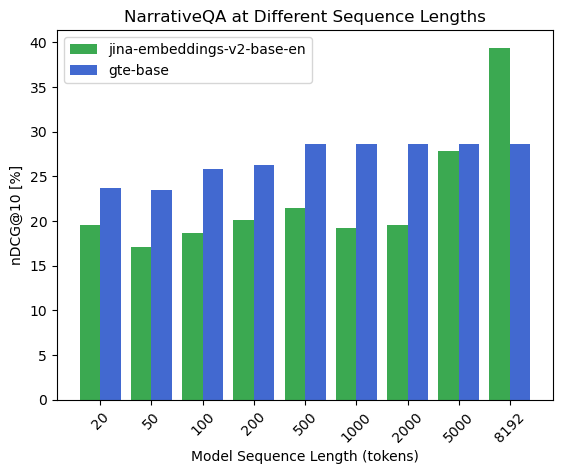

In [12]:
# Data for plotting
chunk_sizes = ["20", "50", "100", "200", "500", "1000", "2000", "5000", "8192"]
ndcg_scores_gte = [23.707, 23.423, 25.815, 26.234, 28.556, 28.556, 28.556, 28.556, 28.556]
ndcg_scores_jina = [19.516, 17.072, 18.607, 20.058, 21.435, 19.238, 19.585, 27.865, 39.381]

# Setting the positions and width for the bars
positions = np.arange(len(chunk_sizes))
width = 0.4  # the width of the bars

# Plotting both the bar charts side by side
plt.bar(positions - width/2, ndcg_scores_jina, width, label='jina-embeddings-v2-base-en', color='#3BA951')
plt.bar(positions + width/2, ndcg_scores_gte, width, label='gte-base', color='#4269D0')

plt.legend()


plt.xlabel('Model Sequence Length (tokens)')
plt.ylabel('nDCG@10 [%]')
plt.title('NarrativeQA at Different Sequence Lengths')
plt.xticks(positions, chunk_sizes)
plt.xticks(rotation=45)

plt.rcParams["font.family"] = "Inter"


# higher resolution output without saving the file
plt.savefig('plots/retrieval/narrativeqa_ndcg_seq.png', dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font f

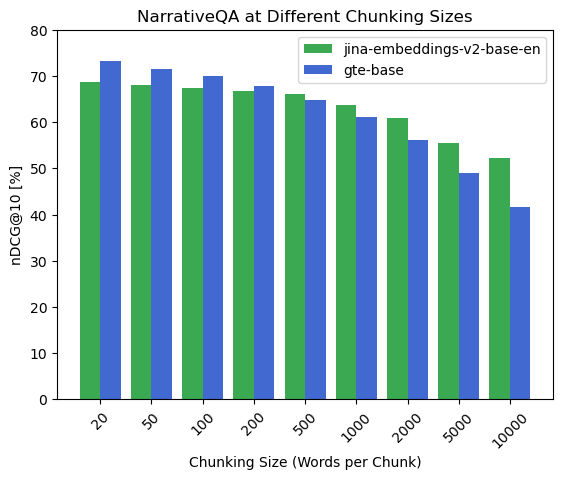

In [13]:
# Data for plotting
chunk_sizes = ["20", "50", "100", "200", "500", "1000", "2000", "5000", "10000"]
ndcg_scores_jina = [68.63 ,68.02, 67.323, 66.722, 66.029, 63.704, 60.843, 55.478, 52.251]
ndcg_scores_gte = [73.335, 71.453, 69.973, 67.945, 64.79, 61.208, 56.246, 49.016, 41.717]

# Setting the positions and width for the bars
positions = np.arange(len(chunk_sizes))
width = 0.4  # the width of the bars


# Plotting both the bar charts side by side
plt.bar(positions - width/2, ndcg_scores_jina, width, label='jina-embeddings-v2-base-en', color='#3BA951')
plt.bar(positions + width/2, ndcg_scores_gte, width, label='gte-base', color='#4269D0')

plt.legend()

plt.xlabel('Chunking Size (Words per Chunk)')
plt.ylabel('nDCG@10 [%]')
plt.title('NarrativeQA at Different Chunking Sizes')
plt.xticks(positions, chunk_sizes)
plt.xticks(rotation=45)


# y axis up to 50
plt.ylim(0, 80)
plt.rcParams["font.family"] = "Inter"


# higher resolution output without saving the file
plt.savefig('plots/retrieval/narrativeqa_ndcg_chunk.png', dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
